# <span style="color:red"> Dataset of one feature and its class belonging is given. Train a model which can predict its dataset</span>

In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
x1 = torch.rand(500, 2)*(-10)

In [3]:
y1 = torch.tensor([[0.] for features in x1])

In [4]:
x2 = torch.rand(500, 2)*(10)

In [5]:
y2 = torch.tensor([[1.] for features in x2])

In [6]:
x = torch.cat((x1, x2), dim=0)

In [7]:
y = torch.cat((y1, y2), dim=0)

In [8]:
DS = {'X': x, 'Y': y}

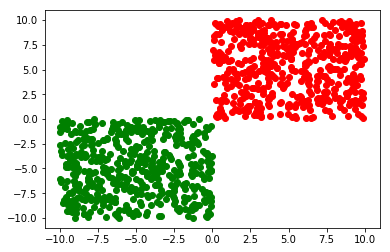

In [9]:
for x_, y_ in zip(DS['X'], DS['Y']):
    if y_==1.:
        plt.plot(x_[0], x_[1], 'ro')
    else:
        plt.plot(x_[0], x_[1], 'go')

### Description of some keyworks:
```
DS: dictionary of provided dataset x, y. DS['X'] is x, DS['Y'] is y.
LOSS: list of losses in epochs
```

# <span style="color:green"> Answer: </span>

## Custom dataset

In [10]:
from torch.utils.data.dataset import Dataset

class MyCustomDataset(Dataset):
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __len__(self):
        return y.shape[0]
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]

In [11]:
dataset = MyCustomDataset(DS['X'], DS['Y'])
train_set, val_set = torch.utils.data.random_split(dataset, [700, 300])

In [12]:
len(train_set)

700

## DataLoader

In [13]:
from torch.utils.data import DataLoader

train_batch_size = 64
val_batch_size = len(val_set)

train_loader = DataLoader(train_set, train_batch_size, shuffle=True)

val_loader = DataLoader(val_set, batch_size = val_batch_size)

# Model

In [14]:
class binary_classification(torch.nn.Module):
    
    def __init__(self, input_size, output_size, hidden_neuron_cnt):
        
        super(binary_classification, self).__init__()
        self.linear1 = torch.nn.Linear(input_size, hidden_neuron_cnt)
        self.act = torch.nn.Sigmoid()
        self.linear2 = torch.nn.Linear(hidden_neuron_cnt, output_size)

    def forward(self, x):
        
        out = self.linear1(x)
        out = self.act(out)
        out = self.linear2(out)
        out = self.act(out)
        return out

In [15]:
model = binary_classification(2, 1, 4)

# Loss

In [16]:
criterion = torch.nn.BCELoss() 

# Optimizer

In [17]:
optimizer = torch.optim.Adam(model.parameters(), lr=.01)

In [18]:
with torch.no_grad():
    y_pred = model(DS['X'])
    y_pred = torch.round(y_pred)

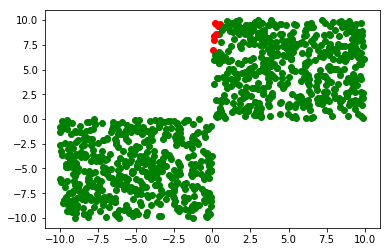

In [19]:
for x_, y_ in zip(DS['X'], y_pred):
    if y_==1.:
        plt.plot(x_[0], x_[1], 'ro')
    else:
        plt.plot(x_[0], x_[1], 'go')

In [20]:
TRAIN_LOSS = []
VAL_LOSS = []
for epoch in range(1000):
    
    sum_train_loss_in_batch = 0.
    sum_val_loss_in_batch = 0.
    
    for x, y in train_loader:
        
        y_hat = model(x)
        loss = criterion(y_hat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        sum_train_loss_in_batch += loss.item()
    
    with torch.no_grad():
        for x, y in val_loader:
            y_hat = model(x)
            loss = criterion(y_hat, y)
            sum_val_loss_in_batch += loss.item()
        
    train_loss_in_epoch = sum_train_loss_in_batch/train_batch_size
    val_loss_in_epoch = sum_val_loss_in_batch/val_batch_size
    
    TRAIN_LOSS.append(train_loss_in_epoch)
    VAL_LOSS.append(val_loss_in_epoch)
    
    print(f"Epoch {epoch} train loss: {train_loss_in_epoch} val loss: {val_loss_in_epoch}")

Epoch 0 train loss: 0.10111857298761606 val loss: 0.0016984820365905761
Epoch 1 train loss: 0.07921106740832329 val loss: 0.0013729276259740193
Epoch 2 train loss: 0.06471417425200343 val loss: 0.001150829295317332
Epoch 3 train loss: 0.05438090721145272 val loss: 0.000969495177268982
Epoch 4 train loss: 0.045927080791443586 val loss: 0.0008161502579847971
Epoch 5 train loss: 0.03896432276815176 val loss: 0.0006936151285966238
Epoch 6 train loss: 0.03338452591560781 val loss: 0.0005954232811927795
Epoch 7 train loss: 0.028868773952126503 val loss: 0.0005165068805217743
Epoch 8 train loss: 0.02523580240085721 val loss: 0.000452694296836853
Epoch 9 train loss: 0.02226078452076763 val loss: 0.00040059313178062437
Epoch 10 train loss: 0.019792856997810304 val loss: 0.0003575024008750916
Epoch 11 train loss: 0.017739325296133757 val loss: 0.00032133147120475767
Epoch 12 train loss: 0.016017790301702917 val loss: 0.0002907405545314153
Epoch 13 train loss: 0.014550463994964957 val loss: 0.000

Epoch 115 train loss: 0.0006164092337712646 val loss: 1.1165642645210028e-05
Epoch 116 train loss: 0.0006075690362195019 val loss: 1.1008648046602805e-05
Epoch 117 train loss: 0.000598534956225194 val loss: 1.0842968088885149e-05
Epoch 118 train loss: 0.0005899082534597255 val loss: 1.068166612337033e-05
Epoch 119 train loss: 0.0005820247388328426 val loss: 1.053985208272934e-05
Epoch 120 train loss: 0.0005731610144721344 val loss: 1.0382771336783965e-05
Epoch 121 train loss: 0.0005658301488438156 val loss: 1.023073447868228e-05
Epoch 122 train loss: 0.0005571797664742917 val loss: 1.0091770285119613e-05
Epoch 123 train loss: 0.0005497473393916152 val loss: 9.954835598667463e-06
Epoch 124 train loss: 0.0005420350207714364 val loss: 9.80618487422665e-06
Epoch 125 train loss: 0.0005358146954677068 val loss: 9.6675551806887e-06
Epoch 126 train loss: 0.0005286928499117494 val loss: 9.539269376546144e-06
Epoch 127 train loss: 0.0005211010829953011 val loss: 9.426702745258808e-06
Epoch 128 t

Epoch 223 train loss: 0.00018289112267666496 val loss: 3.3407755351314944e-06
Epoch 224 train loss: 0.00018100973375112517 val loss: 3.311189745242397e-06
Epoch 225 train loss: 0.00017941011537914164 val loss: 3.2802127922574677e-06
Epoch 226 train loss: 0.00017867397036752664 val loss: 3.2496481435373425e-06
Epoch 227 train loss: 0.00017629766807658598 val loss: 3.222212156591316e-06
Epoch 228 train loss: 0.0001747569103827118 val loss: 3.1925212048615017e-06
Epoch 229 train loss: 0.00017298876628046855 val loss: 3.165815918085476e-06
Epoch 230 train loss: 0.00017154135002783732 val loss: 3.1410495284944773e-06
Epoch 231 train loss: 0.00017046596894942923 val loss: 3.1095514229188364e-06
Epoch 232 train loss: 0.0001686092446107068 val loss: 3.0835271657754976e-06
Epoch 233 train loss: 0.00016692194276402006 val loss: 3.055582055822015e-06
Epoch 234 train loss: 0.00016548450548725668 val loss: 3.0282692750915883e-06
Epoch 235 train loss: 0.00016455176591989584 val loss: 2.9994626917565

Epoch 331 train loss: 7.693978022871306e-05 val loss: 1.4232356140079598e-06
Epoch 332 train loss: 7.636699274371495e-05 val loss: 1.4134803010771671e-06
Epoch 333 train loss: 7.595598208354204e-05 val loss: 1.4039239613339305e-06
Epoch 334 train loss: 7.538171212218003e-05 val loss: 1.3926173172270258e-06
Epoch 335 train loss: 7.463167185051134e-05 val loss: 1.3838655043703815e-06
Epoch 336 train loss: 7.410838816213072e-05 val loss: 1.3729453591319422e-06
Epoch 337 train loss: 7.363861595877097e-05 val loss: 1.3648505167414746e-06
Epoch 338 train loss: 7.330812786676688e-05 val loss: 1.3552908785641194e-06
Epoch 339 train loss: 7.26004154785187e-05 val loss: 1.3450856204144657e-06
Epoch 340 train loss: 7.206350801425288e-05 val loss: 1.3359717559069395e-06
Epoch 341 train loss: 7.175057999120327e-05 val loss: 1.3257816317491234e-06
Epoch 342 train loss: 7.105114855221473e-05 val loss: 1.3172366501142582e-06
Epoch 343 train loss: 7.051824513837346e-05 val loss: 1.3072187236199777e-06


Epoch 442 train loss: 3.628380181908142e-05 val loss: 6.79158401908353e-07
Epoch 443 train loss: 3.597389923015726e-05 val loss: 6.747526155474285e-07
Epoch 444 train loss: 3.5756030229094904e-05 val loss: 6.704664459296813e-07
Epoch 445 train loss: 3.563205837053829e-05 val loss: 6.649901236717899e-07
Epoch 446 train loss: 3.5402154480834724e-05 val loss: 6.617798256532599e-07
Epoch 447 train loss: 3.5084180353806005e-05 val loss: 6.572789667795102e-07
Epoch 448 train loss: 3.485315028228797e-05 val loss: 6.535544525831938e-07
Epoch 449 train loss: 3.462391578068491e-05 val loss: 6.485670261705915e-07
Epoch 450 train loss: 3.439246438574628e-05 val loss: 6.446579936891794e-07
Epoch 451 train loss: 3.418041819713835e-05 val loss: 6.406884737468014e-07
Epoch 452 train loss: 3.395803582861845e-05 val loss: 6.365030033824345e-07
Epoch 453 train loss: 3.377847178853699e-05 val loss: 6.32943604917576e-07
Epoch 454 train loss: 3.353362421876227e-05 val loss: 6.294479923478018e-07
Epoch 455 t

Epoch 549 train loss: 1.8631640159583185e-05 val loss: 3.532742994138971e-07
Epoch 550 train loss: 1.8527067368268035e-05 val loss: 3.508466761559248e-07
Epoch 551 train loss: 1.8466328128852183e-05 val loss: 3.488806396489963e-07
Epoch 552 train loss: 1.8314870203539613e-05 val loss: 3.465550010635828e-07
Epoch 553 train loss: 1.827403673360095e-05 val loss: 3.451159621666496e-07
Epoch 554 train loss: 1.8081949178849754e-05 val loss: 3.430062012436489e-07
Epoch 555 train loss: 1.7980128404815332e-05 val loss: 3.4068206635614234e-07
Epoch 556 train loss: 1.786751170129719e-05 val loss: 3.3840699567614747e-07
Epoch 557 train loss: 1.7773635363482754e-05 val loss: 3.3617211253537486e-07
Epoch 558 train loss: 1.7661647348177212e-05 val loss: 3.346766607137397e-07
Epoch 559 train loss: 1.755629580202367e-05 val loss: 3.325713381248837e-07
Epoch 560 train loss: 1.744595783748082e-05 val loss: 3.3074827418507385e-07
Epoch 561 train loss: 1.7353254861518508e-05 val loss: 3.286532349496459e-07

Epoch 661 train loss: 9.617416083074204e-06 val loss: 1.8387933475120615e-07
Epoch 662 train loss: 9.56793041950732e-06 val loss: 1.831765621318482e-07
Epoch 663 train loss: 9.503336173111165e-06 val loss: 1.819893077481538e-07
Epoch 664 train loss: 9.472191266013397e-06 val loss: 1.8087579519487918e-07
Epoch 665 train loss: 9.432954414023698e-06 val loss: 1.7995161518532163e-07
Epoch 666 train loss: 9.346667411591625e-06 val loss: 1.7891251142524803e-07
Epoch 667 train loss: 9.284505892992456e-06 val loss: 1.7777644340336943e-07
Epoch 668 train loss: 9.231573528722947e-06 val loss: 1.7687707440927624e-07
Epoch 669 train loss: 9.180172867218062e-06 val loss: 1.7581340216565878e-07
Epoch 670 train loss: 9.126603060849448e-06 val loss: 1.7483277285161117e-07
Epoch 671 train loss: 9.090371690945176e-06 val loss: 1.740274941160654e-07
Epoch 672 train loss: 9.02121979606818e-06 val loss: 1.7291890496077638e-07
Epoch 673 train loss: 9.00320867458504e-06 val loss: 1.7174075765069573e-07
Epoch

Epoch 776 train loss: 4.965574873949663e-06 val loss: 9.574587238603271e-08
Epoch 777 train loss: 4.938679040833449e-06 val loss: 9.536511546078448e-08
Epoch 778 train loss: 4.9210486565698375e-06 val loss: 9.485102661225635e-08
Epoch 779 train loss: 4.88450021407516e-06 val loss: 9.442119941619846e-08
Epoch 780 train loss: 4.854073949900339e-06 val loss: 9.380099072586745e-08
Epoch 781 train loss: 4.828162531111957e-06 val loss: 9.321062558835062e-08
Epoch 782 train loss: 4.809910933545325e-06 val loss: 9.266019939483764e-08
Epoch 783 train loss: 4.77258248565704e-06 val loss: 9.223899420855256e-08
Epoch 784 train loss: 4.750796705366156e-06 val loss: 9.17784988511509e-08
Epoch 785 train loss: 4.721725872514071e-06 val loss: 9.125701884234635e-08
Epoch 786 train loss: 4.709809331870929e-06 val loss: 9.061758343401986e-08
Epoch 787 train loss: 4.665611839982375e-06 val loss: 9.013269542871664e-08
Epoch 788 train loss: 4.660315994442499e-06 val loss: 8.950519259087741e-08
Epoch 789 trai

Epoch 884 train loss: 2.697971055454218e-06 val loss: 5.221668592033287e-08
Epoch 885 train loss: 2.6807557702568374e-06 val loss: 5.2098809343685085e-08
Epoch 886 train loss: 2.665757847353234e-06 val loss: 5.173847966943867e-08
Epoch 887 train loss: 2.6515849356201215e-06 val loss: 5.149796682720383e-08
Epoch 888 train loss: 2.6435740636543414e-06 val loss: 5.11469139989155e-08
Epoch 889 train loss: 2.6224362557059067e-06 val loss: 5.098735224843646e-08
Epoch 890 train loss: 2.6048906818232354e-06 val loss: 5.067341589892749e-08
Epoch 891 train loss: 2.592888279195904e-06 val loss: 5.0485274793269734e-08
Epoch 892 train loss: 2.576370690121621e-06 val loss: 5.009842425351963e-08
Epoch 893 train loss: 2.5653296233940637e-06 val loss: 4.97884623958574e-08
Epoch 894 train loss: 2.546791051827313e-06 val loss: 4.953345220807629e-08
Epoch 895 train loss: 2.535381668167247e-06 val loss: 4.922614001164523e-08
Epoch 896 train loss: 2.5191947230496226e-06 val loss: 4.90970038905895e-08
Epoch 

Epoch 994 train loss: 1.4526840459438972e-06 val loss: 2.8372414817567914e-08
Epoch 995 train loss: 1.4456106995908158e-06 val loss: 2.8259167568952155e-08
Epoch 996 train loss: 1.4463050774793373e-06 val loss: 2.8247247125060918e-08
Epoch 997 train loss: 1.4306000295505328e-06 val loss: 2.7916745845383654e-08
Epoch 998 train loss: 1.4230744298515674e-06 val loss: 2.7751815044515145e-08
Epoch 999 train loss: 1.415043044517006e-06 val loss: 2.7731281685798117e-08


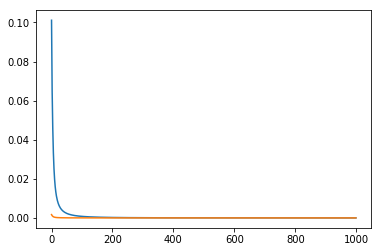

In [21]:
plt.plot(TRAIN_LOSS)
plt.plot(VAL_LOSS)

In [22]:
with torch.no_grad():
    y_pred = model(DS['X'])
    y_pred = torch.round(y_pred)

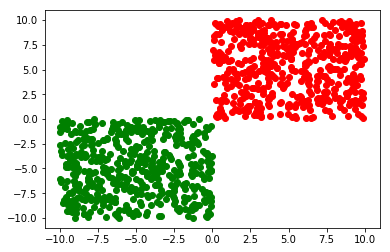

In [23]:
for x_, y_ in zip(DS['X'], y_pred):
    if y_==1.:
        plt.plot(x_[0], x_[1], 'ro')
    else:
        plt.plot(x_[0], x_[1], 'go')